In [439]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import math
import helper
import matplotlib.pyplot as plt

## Summary Stats

In [440]:
df = pd.read_excel('Commodities Data thru 18May23.xlsx')
df.head()

,Dates,LIVE CATTLE FUTR Aug23,LEAN HOGS FUTURE Jul23,COFFEE 'C' FUTURE Jul23,CORN FUTURE Jul23,COTTON NO.2 FUTR Jul23,SOYBEAN FUTURE Jul23,SUGAR #11 (WORLD) Jul23,WHEAT FUTURE(CBT) Jul23,BRENT CRUDE FUTR Jul23,...,SILVER FUTURE Jul23,PLATINUM FUTURE Jul23,WTI CRUDE FUTURE Jun23,LME NICKEL,LME COPPER,LME ALUMINIUM,LME LEAD,LME ZINC,COCOA FUTURE Jul23,HEATING OIL
0,1969-01-01,100.000000,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
1,1969-01-02,99.196150,NaN,NaN,99.580502,100.757884,99.856964,100.971447,99.815252,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.346880,NaN
2,1969-01-03,98.746629,NaN,NaN,100.004906,101.263141,99.606651,101.297884,99.630504,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.432742,NaN
3,1969-01-06,98.746629,NaN,NaN,100.215882,101.841741,99.427856,100.322505,98.804418,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.228964,NaN
4,1969-01-07,99.196150,NaN,NaN,100.215882,100.863825,99.177543,99.347125,97.881999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.855180,NaN


In [441]:
df.iloc[:,1:] = df.iloc[:,1:] / 100

In [442]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [443]:
#clean col names
Assets = pd.read_excel('Commodities Data thru 18May23.xlsx', sheet_name='Assets')
Assets.loc[Assets.index.max() + 1, 'Commodity'] = 'commodity market factor'
Assets.tail()

,Commodity,Sector
19,LME LEAD,Metals
20,LME ZINC,Metals
21,COCOA,Agri & livestock
22,HEATING OIL,Energy
23,commodity market factor,NaN


In [444]:
Assets.iloc[:, 0] = Assets.iloc[:, 0].astype(str)

In [445]:
#commodity market factor
df['commodity market factor'] = df.iloc[:,1:].sum(axis=1) / (df.count(axis=1)-1)

In [446]:
df.columns = [df.columns[0]] + Assets.iloc[:, 0].astype(str).tolist()

In [447]:
col_names = df.columns[1:]
summary = pd.DataFrame(columns=['Commodity', 
                                'First Trading Date', 
                                'Observations', 
                                'Mean', 
                                'Standard Deviation'
                               ])

for commodity in col_names:
    #date
    first_index = df[commodity].first_valid_index()
    
    first_date = df.loc[first_index, 'Dates']
    
    #observations
    valid_comdty = df[commodity].dropna()
    num_obs = len(valid_comdty)
    
    #mean
    mean = valid_comdty.mean()
    
    #std
    std = valid_comdty.std()
    
    summary = summary.append({'Commodity': commodity, 
                              'First Trading Date': first_date, 
                              'Observations': num_obs, 
                              'Mean': mean, 
                              'Standard Deviation': std
                             }, ignore_index=True)

summary.head()

,Commodity,First Trading Date,Observations,Mean,Standard Deviation
0,LIVE CATTLE,1969-01-01,14187,8.730154,4.415486
1,LEAN HOGS,1986-04-02,9687,1.252390,1.025341
2,COFFEE 'C',1972-08-23,13237,2.705678,2.395708
3,CORN,1969-01-01,14187,0.841926,0.678873
4,COTTON NO.2,1969-01-01,14187,1.289587,0.854314


In [448]:
#commodity market factor
df['commodity market factor'] = df.iloc[:,1:].sum(axis=1) / (df.count(axis=1)-1)

In [449]:
df.head()

,Dates,LIVE CATTLE,LEAN HOGS,COFFEE 'C',CORN,COTTON NO.2,SOYBEAN,SUGAR #11,WHEAT FUTURE,BRENT CRUDE,...,PLATINUM,WTI CRUDE,LME NICKEL,LME COPPER,LME ALUMINIUM,LME LEAD,LME ZINC,COCOA,HEATING OIL,commodity market factor
0,1969-01-01,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
1,1969-01-02,0.991961,NaN,NaN,0.995805,1.007579,0.998570,1.009714,0.998153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.023469,NaN,1.003607
2,1969-01-03,0.987466,NaN,NaN,1.000049,1.012631,0.996067,1.012979,0.996305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.024327,NaN,1.004261
3,1969-01-06,0.987466,NaN,NaN,1.002159,1.018417,0.994279,1.003225,0.988044,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002290,NaN,0.999411
4,1969-01-07,0.991961,NaN,NaN,1.002159,1.008638,0.991775,0.993471,0.978820,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.988552,NaN,0.993625


## Lookback Straddle Delta

In [450]:
#create a delta dataframe
deltas = df
deltas = deltas.assign(**{c: np.nan for c in deltas.columns if c != 'Dates'})

In [451]:
#first lookback straddle date calculation function for single asset

def firstdate(asset):
    
    #find t
    comdty_index = summary.loc[summary['Commodity'] == asset].index[0]
    t = df.loc[df['Dates'] == summary.loc[comdty_index,'First Trading Date']].index[0] + 252
    
    return t

In [452]:
#lookback straddle delta v6.2

def lbsdelta(asset):
    
    #loop through the entire time of the asset
    comdty_index = summary.loc[summary['Commodity'] == asset].index[0]
    trade_length = summary.loc[comdty_index, 'Observations'] - 252
    
    for j in range(0, trade_length):
        
        
    
        #initialize
        t = firstdate(asset) + j

        #lookback period
        lb_start = t - 252  #can modify
        lb_end = t - 1

        #time to maturity
        T = 30  #can modify
        expiry = t + T

        #bs values 1
        current_price = df.loc[t, asset]
        options_price = current_price
        HWM = df[asset].loc[lb_start:lb_end].max()
        LWM = df[asset].loc[lb_start:lb_end].min()
        std = df[asset].loc[lb_start:lb_end].std()
        
        if std < 0.002: 
            delta = 1
        else:


            #bs values 2
            r = 0.01  #can modify
            u = r - 0.5 * std ** 2
            d = np.log(options_price / LWM)
            b = np.log(HWM / options_price)

            #black-scholes
            d2 = (-d + u * T) / (std * np.sqrt(T))
            d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
            b2 = (-b - u * T) / (std * np.sqrt(T))
            b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
            delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
                     (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
                     (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(d3) - 
                     (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))


            #outputs from loop
            deltas.loc[t, asset] = delta
        
        j = j + 1
 


In [453]:
# NOT working for every asset, FOR our strategy, only lbsdelta('commodity market factor') is needed

In [318]:
lbsdelta('LIVE CATTLE')

In [321]:
lbsdelta('LEAN HOGS')

lbsdelta("COFFEE 'C'")

lbsdelta('CORN')

lbsdelta('COTTON NO.2')

lbsdelta('SOYBEAN')

In [320]:
#lbsdelta('SUGAR #11')

In [322]:
lbsdelta('WHEAT FUTURE')

lbsdelta('BRENT CRUDE')

lbsdelta('COPPER FUTURE')

lbsdelta('GASOLINE RBOB')

In [324]:
lbsdelta('GOLD 100 OZ')

In [ ]:
#lbsdelta('NATURAL GAS')

In [325]:
lbsdelta('SILVER')

lbsdelta('PLATINUM')

lbsdelta('WTI CRUDE')

/var/folders/2m/747cmn596wlb8vjlb2dn9ys00000gn/T/ipykernel_84832/103413018.py:39: RuntimeWarning: invalid value encountered in log
  d = np.log(options_price / LWM)
/var/folders/2m/747cmn596wlb8vjlb2dn9ys00000gn/T/ipykernel_84832/103413018.py:40: RuntimeWarning: invalid value encountered in log
  b = np.log(HWM / options_price)


In [326]:
lbsdelta('LME NICKEL')

lbsdelta('LME COPPER')

lbsdelta('LME ALUMINIUM')

lbsdelta('LME LEAD')

lbsdelta('LME ZINC')

lbsdelta('COCOA')

lbsdelta('HEATING OIL')

In [454]:
lbsdelta('commodity market factor')

## Signals

In [455]:
#create MA & signals dataframe
ma = deltas
ma = ma.assign(**{c: np.nan for c in ma.columns if c != 'Dates'})

signals = deltas
signals = signals.assign(**{c: 0 for c in signals.columns if c != 'Dates'})

In [456]:
#build MA signals on benchmark
ma['commodity market factor'] = deltas['commodity market factor'].rolling(5).mean()


In [457]:
# Check if the previous value in deltas['commodity market factor'] is greater than the previous value in ma['commodity market factor'], and the current value in deltas['commodity market factor'] is less than the current value in ma['commodity market factor'], output -1 in the signals['commodity market factor'].
signals[((deltas['commodity market factor'].shift(1) > ma['commodity market factor'].shift(1)) &
     (deltas['commodity market factor'] < ma['commodity market factor']))] = -1

# Check if the other way around, output 1 in the signals['commodity market factor'].
signals[((deltas['commodity market factor'].shift(1) < ma['commodity market factor'].shift(1)) &
     (deltas['commodity market factor'] > ma['commodity market factor']))] = 1

# When previous value in deltas['commodity market factor'] is greater than the previous value in ma['commodity market factor'], and the current value in deltas['commodity market factor'] is greater than the current value in ma['commodity market factor'], output 0.
signals[(deltas['commodity market factor'].shift(1) > ma['commodity market factor'].shift(1)) &
     (deltas['commodity market factor'] > ma['commodity market factor'])] = 0

# When previous value in deltas['commodity market factor'] is greater than the previous value in ma['commodity market factor'], and the current value in deltas['commodity market factor'] is greater than the current value in ma['commodity market factor'], output 0.
signals[(deltas['commodity market factor'].shift(1) < ma['commodity market factor'].shift(1)) &
     (deltas['commodity market factor'] < ma['commodity market factor'])] = 0

In [458]:
signals['Dates'] = ma['Dates']

In [459]:
signals.iloc[5480:5523,:]

,Dates,LIVE CATTLE,LEAN HOGS,COFFEE 'C',CORN,COTTON NO.2,SOYBEAN,SUGAR #11,WHEAT FUTURE,BRENT CRUDE,...,PLATINUM,WTI CRUDE,LME NICKEL,LME COPPER,LME ALUMINIUM,LME LEAD,LME ZINC,COCOA,HEATING OIL,commodity market factor
5480,1990-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5481,1990-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5482,1990-01-05,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5483,1990-01-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5484,1990-01-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5485,1990-01-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5486,1990-01-11,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5487,1990-01-12,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5488,1990-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5489,1990-01-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scratch (no need to run)

In [329]:
deltas.to_excel('/Users/austin/Desktop/Semesters/2023 Summer/IC/ATS/Backtesting Project/deltas.xlsx', index=False)

In [438]:
signals.to_excel('/Users/austin/Desktop/Semesters/2023 Summer/IC/ATS/Backtesting Project/signals.xlsx', index=False)

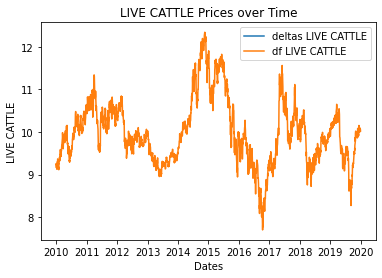

In [461]:
deltas_filtered = deltas.loc[deltas['Dates'].between('2010', '2020')]
df_filtered = df.loc[df['Dates'].between('2010', '2020')]

# Plotting the 'LIVE CATTLE' prices from the filtered dataframes
plt.plot(deltas_filtered['Dates'], deltas_filtered['LIVE CATTLE'], label='deltas LIVE CATTLE')
plt.plot(df_filtered['Dates'], df_filtered['LIVE CATTLE'], label='df LIVE CATTLE')

# Adding labels and title to the plot
plt.xlabel('Dates')
plt.ylabel('LIVE CATTLE')
plt.title('LIVE CATTLE Prices over Time')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'LIVE CATTLE Prices over Time')

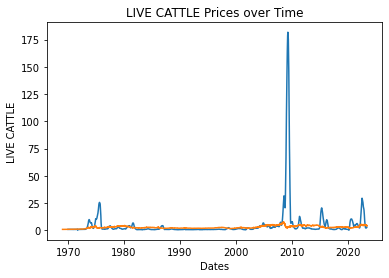

In [462]:
plt.plot(deltas['Dates'], deltas['commodity market factor'])

plt.plot(df['Dates'], df['commodity market factor'], label='DF LIVE CATTLE')
# Adding labels and title to the plot
plt.xlabel('Dates')
plt.ylabel('LIVE CATTLE')
plt.title('LIVE CATTLE Prices over Time')

Text(0.5, 1.0, 'LIVE CATTLE Prices over Time')

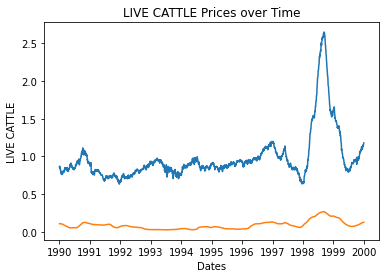

In [463]:
deltas_filtered = deltas.loc[deltas['Dates'].between('1990', '2000')]
vol_filtered = vol.loc[vol['Dates'].between('1990', '2000')]

plt.plot(deltas_filtered['Dates'], deltas_filtered['commodity market factor'])

plt.plot(vol_filtered['Dates'], vol_filtered['commodity market factor'], label='DF LIVE CATTLE')
# Adding labels and title to the plot
plt.xlabel('Dates')
plt.ylabel('LIVE CATTLE')
plt.title('LIVE CATTLE Prices over Time')

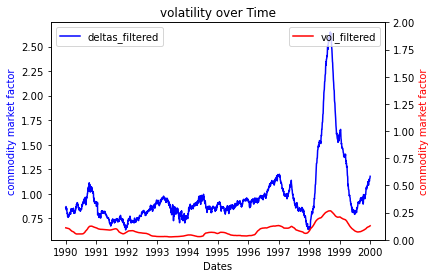

In [464]:

# Assuming 'deltas_filtered' and 'vol_filtered' are your filtered dataframes

# Create a new figure and axes
fig, ax1 = plt.subplots()

# Plot the 'deltas_filtered' dataframe on the primary y-axis
ax1.plot(deltas_filtered['Dates'], deltas_filtered['commodity market factor'], color='blue')
ax1.set_xlabel('Dates')
ax1.set_ylabel('commodity market factor', color='blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the 'vol_filtered' dataframe on the secondary y-axis
ax2.plot(vol_filtered['Dates'], vol_filtered['commodity market factor'], color='red')
ax2.set_ylabel('commodity market factor', color='red')

# Set the y-axis limits for the secondary y-axis
ax2.set_ylim(0, 2)

# Add a legend
ax1.legend(['deltas_filtered'])
ax2.legend(['vol_filtered'])

# Set the title of the plot
plt.title('volatility over Time')

# Display the plot
plt.show()


Text(0.5, 1.0, 'LIVE CATTLE Prices over Time')

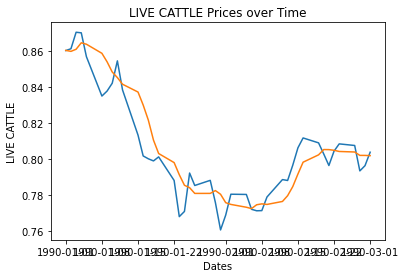

In [412]:
ma_filtered = ma.loc[signals['Dates'].between('1990-01', '1990-03')]
df_filtered = df.loc[df['Dates'].between('1990-01', '1990-03')]

plt.plot(deltas_filtered['Dates'], deltas_filtered['commodity market factor'])

plt.plot(ma_filtered['Dates'], ma_filtered['commodity market factor'], label='DF LIVE CATTLE')
# Adding labels and title to the plot
plt.xlabel('Dates')
plt.ylabel('LIVE CATTLE')
plt.title('LIVE CATTLE Prices over Time')

Text(0.5, 1.0, 'LIVE CATTLE Prices over Time')

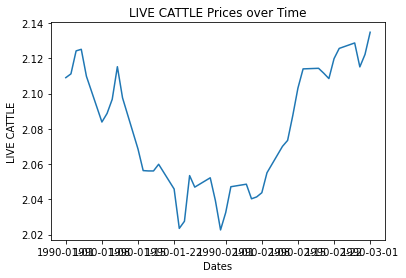

In [397]:
deltas_filtered = deltas.loc[deltas['Dates'].between('1990-01', '1990-03')]
df_filtered = df.loc[df['Dates'].between('1990-01', '1990-03')]

#plt.plot(deltas['Dates'], deltas['commodity market factor'])

plt.plot(df_filtered['Dates'], df_filtered['commodity market factor'], label='DF LIVE CATTLE')
# Adding labels and title to the plot
plt.xlabel('Dates')
plt.ylabel('LIVE CATTLE')
plt.title('LIVE CATTLE Prices over Time')

In [315]:
#lookback straddle delta test

asset = 'LIVE CATTLE'
    
#initialize
t = firstdate(asset)

    

        
#lookback period
lb_start = t - 252
lb_end = t - 1

#time to maturity
T = 30


#bs values 1
current_price = df.loc[t, asset]
options_price = current_price
HWM = df[asset].loc[lb_start:lb_end].max()
LWM = df[asset].loc[lb_start:lb_end].min()
std = 0.002

#bs values 2
r = 0.01 #assumption
u = r - 0.5 * std ** 2
d = np.log(options_price / LWM)
b = np.log(HWM / options_price)

#black-scholes
d2 = (-d + u * T) / (std * np.sqrt(T))
d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
b2 = (-b - u * T) / (std * np.sqrt(T))
b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
         (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
         (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(d3) - 
         (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))





#output from loop
delta



1.0002

In [256]:
#lookback straddle delta v6.2

def lbsdelta(asset):
    
    #loop through the entire time of the asset
    comdty_index = summary.loc[summary['Commodity'] == asset].index[0]
    trade_length = summary.loc[comdty_index, 'Observations'] - 252
    
    for j in range(0, trade_length):
        
        
    
        #initialize
        t = firstdate(asset) + j

        #lookback period
        lb_start = t - 252  #can modify
        lb_end = t - 1

        #time to maturity
        T = 30  #can modify
        expiry = t + T

        #bs values 1
        current_price = df.loc[t, asset]
        options_price = current_price
        HWM = df[asset].loc[lb_start:lb_end].max()
        LWM = df[asset].loc[lb_start:lb_end].min()
        std = df[asset].loc[lb_start:lb_end].std()

        #bs values 2
        r = 0.01  #can modify
        u = r - 0.5 * std ** 2
        d = np.log(options_price / LWM)
        b = np.log(HWM / options_price)

        #black-scholes
        d2 = (-d + u * T) / (std * np.sqrt(T))
        d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        b2 = (-b - u * T) / (std * np.sqrt(T))
        b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
                 (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
                 (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(d3) - 
                 (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))


        #outputs from loop
        deltas.loc[t, asset] = delta
        
        j = j + 1
 


In [312]:
#lookback straddle delta v6.1

def lbsdelta(asset):
    
    #loop through the entire time of the asset
    comdty_index = summary.loc[summary['Commodity'] == asset].index[0]
    trade_length = summary.loc[comdty_index, 'Observations'] - 252
    
    for j in range(0, trade_length):
        
        
    
        #initialize
        t = firstdate(asset) + j
        storage = []

        for i in range(0,251):

            #lookback period
            lb_start = t - (252-i)
            lb_end = t - 1

            #time to maturity
            T = 1 + i
            expiry = t + T

            #bs values 1
            current_price = df.loc[t, asset]
            options_price = current_price
            HWM = df[asset].loc[lb_start:lb_end].max()
            LWM = df[asset].loc[lb_start:lb_end].min()
            std = df[asset].loc[lb_start:lb_end].std()
            #if std less than 0.002, delta = -1
            if std < 0.002: 
                delta = -1
            else:
                #bs values 2
                r = 0.01 #assumption
                u = r - 0.5 * std ** 2
                d = np.log(options_price / LWM)
                b = np.log(HWM / options_price)

                #black-scholes
                d2 = (-d + u * T) / (std * np.sqrt(T))
                d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
                b2 = (-b - u * T) / (std * np.sqrt(T))
                b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
                delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
                         (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
                         (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-d3) - 
                         (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))

            #store the deltas
            storage.append(delta)

            i = i + 1

        #outputs from inner loop
        final_delta = np.sum(storage) / len(storage)
        deltas.loc[t, asset] = final_delta
        
        j = j + 1
 
    #output from function

In [259]:
#lookback straddle delta v5.31

def lbsdelta(asset):
    
    #initialize
    t = firstdate(asset)
    storage = []
    
    for i in range(0,251):
        
        #lookback period
        lb_start = t - (252-i)
        lb_end = t - 1
        
        #time to maturity
        T = 1 + i
        expiry = t + T
        
        #bs values 1
        current_price = df.loc[t, asset]
        options_price = current_price
        HWM = df[asset].loc[lb_start:lb_end].max()
        LWM = df[asset].loc[lb_start:lb_end].min()
        std = df[asset].loc[lb_start:lb_end].std()
        
        #bs values 2
        r = 0.01 #assumption
        u = r - 0.5 * std ** 2
        d = np.log(options_price / LWM)
        b = np.log(HWM / options_price)
        
        #black-scholes
        d2 = (-d + u * T) / (std * np.sqrt(T))
        d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        b2 = (-b - u * T) / (std * np.sqrt(T))
        b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
                 (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
                 (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-d3) - 
                 (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))
        
        #store the deltas
        storage.append(delta)
        
        i = i + 1
        
    #output from loop
    final_delta = np.sum(storage) / len(storage)
 
    #output from function
    return final_delta

In [260]:
#lookback straddle delta v5.31

def lbsdelta(asset):
    
    #initialize
    t = firstdate(asset)
    storage = []
    
    for i in range(0,251):
        
        #lookback period
        lb_start = t - (252-i)
        lb_end = t - 1
        
        #time to maturity
        T = 1 + i
        expiry = t + T
        
        #bs values 1
        current_price = df.loc[t, asset]
        options_price = current_price
        HWM = df[asset].loc[lb_start:lb_end].max()
        LWM = df[asset].loc[lb_start:lb_end].min()
        std = df[asset].loc[lb_start:lb_end].std()
        
        #bs values 2
        r = 0.01 #assumption
        u = r - 0.5 * std ** 2
        d = np.log(options_price / LWM)
        b = np.log(HWM / options_price)
        
        #black-scholes
        d2 = (-d + u * T) / (std * np.sqrt(T))
        d3 = (-d - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        b2 = (-b - u * T) / (std * np.sqrt(T))
        b3 = (b - (r + 0.5 * std ** 2) * T) / (std * np.sqrt(T))
        delta = ((1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-b3) + 
                 (u / std) * math.exp(-r * T + 2 * r * b / std **2) * stats.norm.cdf(b2) - 
                 (1 + (0.5 * std ** 2) / r) * stats.norm.cdf(-d3) - 
                 (u / std) * math.exp(-r * T - 2 * r * d / std **2) * stats.norm.cdf(d2))
        
        #store the deltas
        storage.append(delta)
        
        i = i + 1
        
    #output from loop
    final_delta = np.sum(storage) / len(storage)
 
    #output from function
    return final_delta